In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn import ensemble
from sklearn import metrics

df = pd.read_csv("https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv")

numrows = 25549

RF_df = pd.DataFrame({'three_days_ago' : [0.0]*numrows,
                      'two_days_ago' : [0.0]*numrows,
                      'yesterday' : [0.0]*numrows,
                      'today' : [0.0]*numrows,
                                "tomorrow" : [True]*numrows})

seq = ["three_days_ago",
       "two_days_ago",
       "yesterday",
       "today",
      "tomorrow"]

RF_df = RF_df.reindex(columns=seq)

for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    yesterday = df.iloc[(i-2),1]
    two_days_ago = df.iloc[(i-3),1]
    three_days_ago = df.iloc[(i-4),1]
    RF_df.iat[i,4] = tomorrow
    RF_df.iat[i,3] = today
    RF_df.iat[i,2] = yesterday
    RF_df.iat[i,1] = two_days_ago
    RF_df.iat[i,0] = three_days_ago
    
RF_df = RF_df.dropna()

In [3]:
RF_df.head(20)

,three_days_ago,two_days_ago,yesterday,today,tomorrow
0,0.00,0.00,0.00,0.00,True
1,0.00,0.00,0.00,0.47,True
2,0.00,0.00,0.47,0.59,True
3,0.00,0.47,0.59,0.42,True
4,0.47,0.59,0.42,0.31,True
5,0.59,0.42,0.31,0.17,True
6,0.42,0.31,0.17,0.44,True
7,0.31,0.17,0.44,0.41,True
8,0.17,0.44,0.41,0.04,True
9,0.44,0.41,0.04,0.12,True


In [4]:
from sklearn import ensemble
#modify the data to work with this model
x = RF_df.today.values+RF_df.yesterday.values+RF_df.two_days_ago.values+RF_df.three_days_ago.values
y = RF_df.tomorrow.values
x = x.reshape(RF_df.shape[0], 1)

In [9]:
clf = ensemble.RandomForestClassifier(n_estimators=10).fit(x, y)

In [10]:
#we can calculate the accuarcy using the score method
score = clf.score(x,y)
print(score)

0.6666014095536413


In [11]:
from sklearn import metrics
#we can also make a simple confusion matrix
predictions = clf.predict(x)
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[11059  3579]
 [ 4936  5966]]


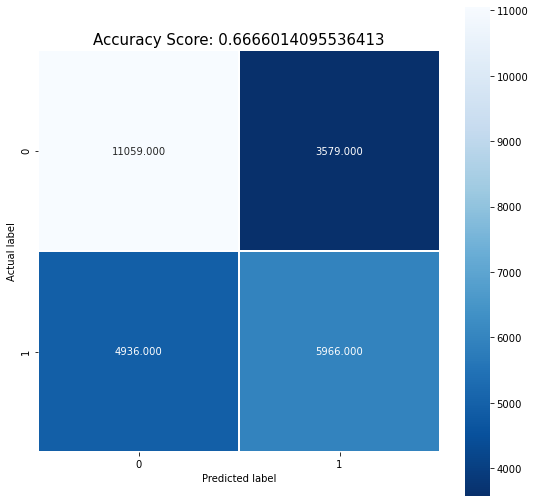

In [12]:
#Here is a bit nicer matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);